In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score, train_test_split, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, make_scorer
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.pipeline import make_pipeline
from catboost import CatBoostClassifier, Pool
from catboost.utils import get_confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
data = pd.read_csv('~/Electrocardiography/Фурье с накрывающей/CombinedCovering.csv')
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0.1         756 non-null    int64 
 1   Unnamed: 0           756 non-null    int64 
 2   disease_diabetes     756 non-null    int64 
 3   disease_ibs          756 non-null    int64 
 4   respiratory_disease  756 non-null    int64 
 5   covering_function_x  756 non-null    object
 6   covering_function_y  756 non-null    object
 7   filename             756 non-null    object
dtypes: int64(5), object(3)
memory usage: 47.4+ KB


,Unnamed: 0.1,Unnamed: 0,disease_diabetes,disease_ibs,respiratory_disease,covering_function_x,covering_function_y,filename
0,0,0,0,0,0,[ 0.86666667 1.2 2.5 3.733333...,[ 30.45098127 167.66534304 76.09194563 143.77...,/content/drive/MyDrive/Проект ЭКГ/Фурье с накр...
1,1,1,0,0,0,[ 0.96666667 1.45 2.9 3.016666...,[ 11.61785368 138.3566481 126.71450909 65.47...,/content/drive/MyDrive/Проект ЭКГ/Фурье с накр...
2,2,2,0,0,0,[ 0.73333333 1.5 2.98333333 3.1 ...,[ 14.73933667 138.70281923 47.70500912 141.70...,/content/drive/MyDrive/Проект ЭКГ/Фурье с накр...
3,3,3,0,0,0,[ 0.83333333 1.53333333 2.95 3.05 ...,[ 10.45880901 176.14670123 60.50264321 135.84...,/content/drive/MyDrive/Проект ЭКГ/Фурье с накр...
4,4,4,0,0,0,[ 0.95 1.51666667 2.95 3.033333...,[ 19.82060228 154.18046999 79.26029203 201.44...,/content/drive/MyDrive/Проект ЭКГ/Фурье с накр...
...,...,...,...,...,...,...,...,...
751,95,95,1,1,0,[ 0.96666667 1.95 2.9 3.916666...,[134.23190117 115.37165359 208.18684596 157.62...,/content/drive/MyDrive/Проект ЭКГ/Фурье с накр...
752,96,96,1,1,0,[ 0.98333333 1.93333333 2.93333333 3.916666...,[136.44001679 80.20403612 157.12026304 304.46...,/content/drive/MyDrive/Проект ЭКГ/Фурье с накр...
753,97,97,1,1,0,[ 0.93333333 1.18333333 2.18333333 3.283333...,[ 66.88897493 166.21192835 152.93010887 175.44...,/content/drive/MyDrive/Проект ЭКГ/Фурье с накр...
754,98,98,1,1,0,[ 0.91666667 1.83333333 2.76666667 3.716666...,[ 91.91672867 141.05014127 174.8236028 138.09...,/content/drive/MyDrive/Проект ЭКГ/Фурье с накр...


## X_train collecting

In [3]:
X = data[['covering_function_x', 'covering_function_y']]
X

,covering_function_x,covering_function_y
0,[ 0.86666667 1.2 2.5 3.733333...,[ 30.45098127 167.66534304 76.09194563 143.77...
1,[ 0.96666667 1.45 2.9 3.016666...,[ 11.61785368 138.3566481 126.71450909 65.47...
2,[ 0.73333333 1.5 2.98333333 3.1 ...,[ 14.73933667 138.70281923 47.70500912 141.70...
3,[ 0.83333333 1.53333333 2.95 3.05 ...,[ 10.45880901 176.14670123 60.50264321 135.84...
4,[ 0.95 1.51666667 2.95 3.033333...,[ 19.82060228 154.18046999 79.26029203 201.44...
...,...,...
751,[ 0.96666667 1.95 2.9 3.916666...,[134.23190117 115.37165359 208.18684596 157.62...
752,[ 0.98333333 1.93333333 2.93333333 3.916666...,[136.44001679 80.20403612 157.12026304 304.46...
753,[ 0.93333333 1.18333333 2.18333333 3.283333...,[ 66.88897493 166.21192835 152.93010887 175.44...
754,[ 0.91666667 1.83333333 2.76666667 3.716666...,[ 91.91672867 141.05014127 174.8236028 138.09...


In [4]:
for column_name in ['covering_function_x', 'covering_function_y']:
    for index in range(X.shape[0]):
        X[column_name][index] = X[column_name][index].strip('[]').strip('\n').replace('\n', '').strip(' ')
        X[column_name][index] = X[column_name][index].split(' ')

        vals = []
        clear_vals = []
        for elem in X[column_name][index]:
            if elem != '' or elem!= ' ':
                vals.append(elem)
        for element in vals:
            if element != '':
                clear_vals.append(eval(element))
        clear_vals = np.array(clear_vals)

        X[column_name][index] = clear_vals
X

/tmp/ipykernel_59600/188794838.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column_name][index] = X[column_name][index].strip('[]').strip('\n').replace('\n', '').strip(' ')
/tmp/ipykernel_59600/188794838.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column_name][index] = X[column_name][index].split(' ')
/tmp/ipykernel_59600/188794838.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column_name][index] = clear_val

,covering_function_x,covering_function_y
0,"[0.86666667, 1.2, 2.5, 3.73333333, 4.73333333,...","[30.45098127, 167.66534304, 76.09194563, 143.7..."
1,"[0.96666667, 1.45, 2.9, 3.01666667, 4.4, 5.833...","[11.61785368, 138.3566481, 126.71450909, 65.47..."
2,"[0.73333333, 1.5, 2.98333333, 3.1, 4.66666667,...","[14.73933667, 138.70281923, 47.70500912, 141.7..."
3,"[0.83333333, 1.53333333, 2.95, 3.05, 4.6333333...","[10.45880901, 176.14670123, 60.50264321, 135.8..."
4,"[0.95, 1.51666667, 2.95, 3.03333333, 4.55, 5.9...","[19.82060228, 154.18046999, 79.26029203, 201.4..."
...,...,...
751,"[0.96666667, 1.95, 2.9, 3.91666667, 4.86666667...","[134.23190117, 115.37165359, 208.18684596, 157..."
752,"[0.98333333, 1.93333333, 2.93333333, 3.9166666...","[136.44001679, 80.20403612, 157.12026304, 304...."
753,"[0.93333333, 1.18333333, 2.18333333, 3.2833333...","[66.88897493, 166.21192835, 152.93010887, 175...."
754,"[0.91666667, 1.83333333, 2.76666667, 3.7166666...","[91.91672867, 141.05014127, 174.8236028, 138.0..."


## Y processing

In [5]:
Y = data[['disease_diabetes', 'disease_ibs', 'respiratory_disease']]
y = pd.DataFrame()
for line in range(Y.shape[0]):
    disease = {'diseases': str([Y['disease_diabetes'][line], Y['disease_ibs'][line], Y['respiratory_disease'][line]])}
    y = y.append(disease, ignore_index=True)
y

/tmp/ipykernel_59600/4149960196.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y = y.append(disease, ignore_index=True)
/tmp/ipykernel_59600/4149960196.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y = y.append(disease, ignore_index=True)
/tmp/ipykernel_59600/4149960196.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y = y.append(disease, ignore_index=True)
/tmp/ipykernel_59600/4149960196.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y = y.append(disease, ignore_index=True)
/tmp/ipykernel_59600/4149960196.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

,diseases
0,"[0, 0, 0]"
1,"[0, 0, 0]"
2,"[0, 0, 0]"
3,"[0, 0, 0]"
4,"[0, 0, 0]"
...,...
751,"[1, 1, 0]"
752,"[1, 1, 0]"
753,"[1, 1, 0]"
754,"[1, 1, 0]"


## ML with crutch

In [6]:
df = pd.DataFrame()
for index in range(X.shape[0]):
    arr = np.zeros(40, dtype=float)
    for i in range(len(X['covering_function_x'][index])):
        arr[i] = X['covering_function_y'][index][i] / X['covering_function_x'][index][i]
    interim = pd.DataFrame(np.array(arr).reshape(-1,1).T)
    df = pd.concat([df, interim], ignore_index=True)
df

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,35.135747,139.721119,30.436778,38.511728,27.349829,21.899856,10.113944,10.828814,9.608580,5.487473,...,0.405058,0.354573,0.248664,0.203901,0.195263,0.189152,0.167930,0.124762,0.252025,0.130795
1,12.018469,95.418378,43.694658,21.702919,38.019762,33.584732,12.017752,18.231654,14.128799,5.141841,...,0.495293,0.553201,0.403930,0.313368,0.267255,0.240211,0.205660,0.154253,0.239127,0.144408
2,20.099096,92.468546,15.990506,45.710024,27.908987,10.554029,24.386631,21.020676,5.291279,9.263034,...,0.660087,0.576780,0.419977,0.418048,0.301349,0.287074,0.191862,0.161243,0.231038,0.140577
3,12.550571,114.878284,20.509371,44.538359,30.144479,19.178189,26.805773,19.372644,9.987623,11.258150,...,0.572269,0.521481,0.382526,0.401364,0.420726,0.265224,0.182950,0.226089,0.252364,0.154055
4,20.863792,101.657453,26.867896,66.410990,58.441889,16.535760,27.491595,25.682472,6.494817,17.286971,...,0.711980,0.556293,0.437925,0.416973,0.283415,0.243090,0.194580,0.172251,0.131927,0.124223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,138.860587,59.164951,71.788568,40.244238,26.272153,25.843854,22.741659,13.459004,15.643077,9.782416,...,0.386510,0.292692,0.228561,0.225415,0.212006,0.244316,0.220760,0.176474,0.676526,0.121224
752,138.752560,41.484846,53.563726,77.735457,27.008716,29.844081,24.621719,16.543993,15.235344,9.652475,...,0.400727,0.299364,0.304987,0.197006,0.189483,0.202952,0.137108,0.178580,1.064817,0.118822
753,71.666759,140.460785,70.044325,53.436446,27.784313,15.967302,15.135060,14.286545,11.291712,8.307765,...,0.401825,0.328440,0.273332,0.227349,0.213095,0.171604,0.127462,0.177000,0.394527,0.164882
754,100.272795,76.936441,63.189254,37.156294,26.681684,23.345032,17.143632,12.194577,9.365103,8.660277,...,0.328669,0.382585,0.310523,0.228787,0.357704,0.306306,0.230212,0.169598,0.846210,0.157014


In [7]:
X_train, X_test, y_train, y_test = train_test_split(df, y, train_size = 0.9)
X_train.shape, y_train.shape

((680, 40), (680, 1))

In [8]:
labels = y_train['diseases'].unique()
y_train = y_train.to_numpy().ravel()

### RandomForestClassifier

Cross Validation accuracy scores: [0.73529412 0.76470588 0.66176471 0.57352941 0.72058824 0.61764706
 0.66176471 0.73529412 0.67647059 0.64705882]
Cross Validation accuracy: 0.679 +/- 0.056
Best Parameters:
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 100, 'n_jobs': -1, 'warm_start': True}
Random Forest accuracy: 0.776
Random Forest f1-score: 0.55
              precision    recall  f1-score   support

   [0, 0, 0]       0.84      0.95      0.89        22
   [0, 0, 1]       0.82      1.00      0.90        14
   [0, 1, 0]       0.93      0.76      0.84        17
   [1, 0, 0]       0.73      0.61      0.67        18
   [1, 0, 1]       0.00      0.00      0.00         2
   [1, 1, 0]       0.00      0.00      0.00         3

    accuracy                           0.78        76
   macro avg       0.55      0.56      0.55        76
weighted avg       0.78      0.78      0.77        76



/home/artem/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/artem/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/artem/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


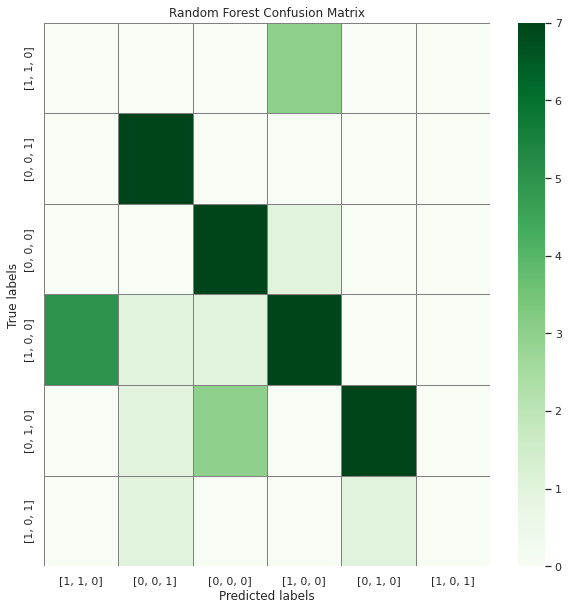

In [9]:
# Hyperparameters search grid 
rf_param_grid = {'bootstrap': [False],
         'n_estimators': [50, 100, 150],
         'max_features': ['log2'],
         'min_samples_leaf': [2],
         'min_samples_split': [7, 9],
         # 'class_weight' : ["balanced_subsample"],
                 'criterion' : ['entropy'],
                 'max_depth' : [20, 25, 30],
                 'n_jobs' : [-1], 'warm_start' : [True]
        }

# Instantiate random forest classifier
rf_estimator = RandomForestClassifier(random_state=0)

# Create the GridSearchCV object
rf_model = GridSearchCV(estimator=rf_estimator, param_grid=rf_param_grid, cv=3, scoring='accuracy')


kf = KFold(n_splits=10)
results = cross_val_score(rf_model, X_train, y_train, cv=kf)
print('Cross Validation accuracy scores: %s' % results)
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(results),np.std(results)))
print('===================')

# Fine-tune the hyperparameters
rf_model.fit(X_train, y_train)

print("Best Parameters:\n", rf_model.best_params_)

# Get the best model
rf_model_best = rf_model.best_estimator_

# Make predictions using the optimised parameters
rf_pred = rf_model_best.predict(X_test)

print('Random Forest accuracy:', round(accuracy_score(y_test, rf_pred), 3))
print('Random Forest f1-score:', round(f1_score(y_test, rf_pred, average='macro'), 3))
print(classification_report(y_test, rf_model_best.predict(X_test)))

cm_rf = confusion_matrix(y_test, rf_pred, labels=labels)

k = 7
cm_rf[cm_rf > k] = k

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm_rf,  ax=ax, fmt='g', cmap='Greens', 
            xticklabels=labels, yticklabels=labels, 
            linewidth=1, linecolor='grey')

# labels, title and ticks
_ = ax.set_xlabel('Predicted labels')
_ = ax.set_ylabel('True labels') 
_ = ax.set_title('Random Forest Confusion Matrix')

### NaiveBayes

Cross Validation accuracy scores: [0.45588235 0.41176471 0.32352941 0.42647059 0.38235294 0.33823529
 0.38235294 0.39705882 0.42647059 0.33823529]
Cross Validation accuracy: 0.388 +/- 0.042
Best Parameters:
 {'var_smoothing': 1e-09}
Naive Bayes accuracy: 0.461
Naive Bayes macro f1-score: 0.436
              precision    recall  f1-score   support

   [0, 0, 0]       0.69      0.41      0.51        22
   [0, 0, 1]       0.82      0.64      0.72        14
   [0, 1, 0]       0.77      0.59      0.67        17
   [1, 0, 0]       1.00      0.17      0.29        18
   [1, 0, 1]       0.17      0.50      0.25         2
   [1, 1, 0]       0.10      1.00      0.18         3

    accuracy                           0.46        76
   macro avg       0.59      0.55      0.44        76
weighted avg       0.77      0.46      0.51        76



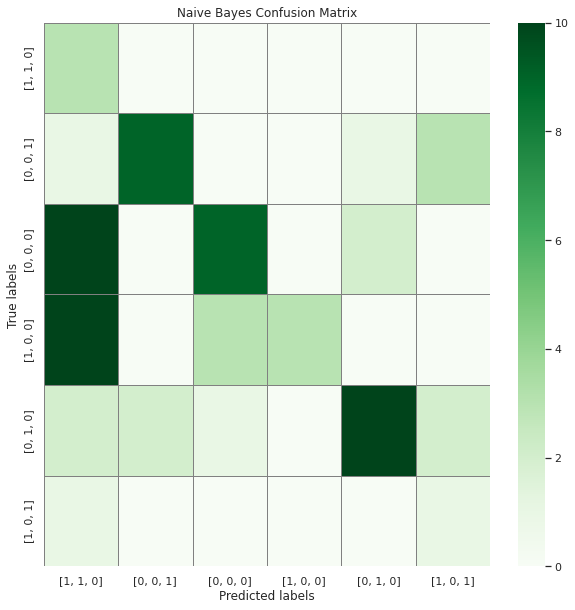

In [10]:
# Hyperparameters search grid 
nb_param_grid = {'var_smoothing': [1e-9, 1e-15, 1e-5, 0]}

# Instantiate naive bayes classifier
nb_estimator = GaussianNB()

# Create a Gaussian classifier
nb_model = GridSearchCV(estimator=nb_estimator, param_grid=nb_param_grid, cv=3, scoring='accuracy')


kf = KFold(n_splits=10)
results = cross_val_score(nb_model, X_train, y_train, cv=kf)
print('Cross Validation accuracy scores: %s' % results)
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(results),
                                                    np.std(results)))
print('===================')

nb_model.fit(X_train, y_train)

print("Best Parameters:\n", nb_model.best_params_)

nb_pred = nb_model.predict(X_test)

print('Naive Bayes accuracy:', round(accuracy_score(y_test, nb_pred), 3))
print('Naive Bayes macro f1-score:', round(f1_score(y_test, nb_pred, average='macro'), 3))
print(classification_report(y_test, nb_model.predict(X_test)))

cm_nb = confusion_matrix(y_test, nb_pred, labels=labels)

k = 10
cm_nb[cm_nb > k] = k

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm_nb, ax=ax, fmt='g', cmap='Greens', 
            xticklabels=labels, yticklabels=labels, 
            linewidth=1, linecolor='grey') 

# labels, title and ticks
_ = ax.set_xlabel('Predicted labels')
_ = ax.set_ylabel('True labels') 
_ = ax.set_title('Naive Bayes Confusion Matrix')

### Catboost

In [13]:
cat = CatBoostClassifier(silent=True)
params = {  
    "max_depth": [3],
    "learning_rate": [0.15],
    "iterations": [75]
}

search_cat = GridSearchCV(estimator=cat, param_grid = params, n_jobs=-1)
kf = KFold(n_splits=10)
results = cross_val_score(search_cat, X_train, y_train, cv=kf)
print('Cross Validation accuracy scores: %s' % results)
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(results),
                                                    np.std(results)))
print('===================')

search_cat.fit(X_train, y_train)
print(search_cat.best_params_)

print(classification_report(y_test, search_cat.best_estimator_.predict(X_test)))

Cross Validation accuracy scores: [0.79411765 0.85294118 0.70588235 0.64705882 0.76470588 0.69117647
 0.69117647 0.75       0.75       0.70588235]
Cross Validation accuracy: 0.735 +/- 0.057
{'iterations': 75, 'learning_rate': 0.15, 'max_depth': 3}
              precision    recall  f1-score   support

   [0, 0, 0]       0.86      0.86      0.86        22
   [0, 0, 1]       0.87      0.93      0.90        14
   [0, 1, 0]       0.93      0.82      0.87        17
   [1, 0, 0]       0.74      0.94      0.83        18
   [1, 0, 1]       1.00      0.50      0.67         2
   [1, 1, 0]       0.00      0.00      0.00         3

    accuracy                           0.84        76
   macro avg       0.73      0.68      0.69        76
weighted avg       0.82      0.84      0.82        76



/home/artem/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/artem/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/artem/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

   [0, 0, 0]       0.86      0.86      0.86        22
   [0, 0, 1]       0.87      0.93      0.90        14
   [0, 1, 0]       0.93      0.82      0.87        17
   [1, 0, 0]       0.74      0.94      0.83        18
   [1, 0, 1]       1.00      0.50      0.67         2
   [1, 1, 0]       0.00      0.00      0.00         3

    accuracy                           0.84        76
   macro avg       0.73      0.68      0.69        76
weighted avg       0.82      0.84      0.82        76



/home/artem/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/artem/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/artem/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


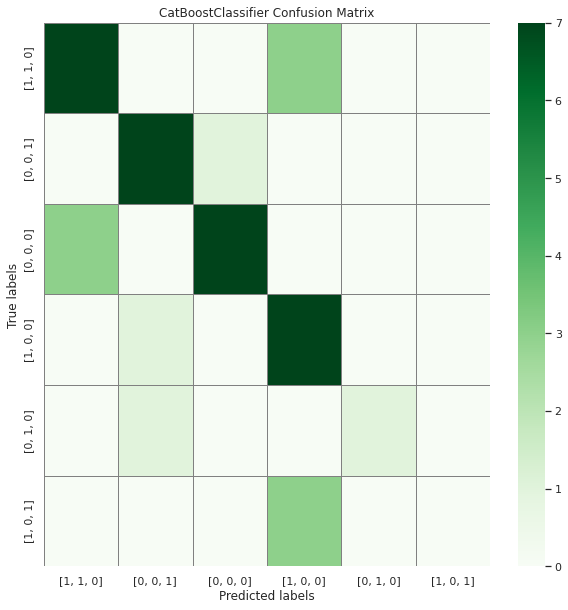

In [14]:
cat = CatBoostClassifier(silent=True, max_depth=3, learning_rate=0.15, iterations=75, thread_count=-1)
cat.fit(X_train, y_train)

print(classification_report(y_test, cat.predict(X_test)))

cm_cat = get_confusion_matrix(cat, Pool(X_test, y_test))

k = 7
cm_cat[cm_cat > k] = k

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm_cat,  ax=ax, fmt='g', cmap='Greens', 
            xticklabels=labels, yticklabels=labels, 
            linewidth=1, linecolor='grey')

# labels, title and ticks
_ = ax.set_xlabel('Predicted labels')
_ = ax.set_ylabel('True labels') 
_ = ax.set_title('CatBoostClassifier Confusion Matrix')

In [29]:
cat.save_model('CatboostTrained')

In [33]:
new_cat = CatBoostClassifier(silent=True)
new_cat.load_model('CatboostTrained')
print(classification_report(y_test, new_cat.predict(X_test)))

              precision    recall  f1-score   support

   [0, 0, 0]       0.91      0.97      0.94        32
   [0, 0, 1]       0.74      0.88      0.80        32
   [0, 1, 0]       0.86      0.66      0.75        29
   [1, 0, 0]       0.56      0.79      0.66        39
   [1, 0, 1]       0.00      0.00      0.00         2
   [1, 1, 0]       0.00      0.00      0.00        18

    accuracy                           0.72       152
   macro avg       0.51      0.55      0.52       152
weighted avg       0.66      0.72      0.68       152



/home/artem/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/artem/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/artem/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic Regression

/home/artem/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Cross Validation accuracy scores: [0.72058824 0.72058824 0.66176471 0.64705882 0.66176471 0.69117647
 0.66176471 0.73529412 0.73529412 0.72058824]
Cross Validation accuracy: 0.696 +/- 0.033
Best Parameters:
 {'C': 3, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear', 'warm_start': True}
Logistic Regression accuracy: 0.697
Logistic Regression macro f1-score: 0.507
              precision    recall  f1-score   support

   [0, 0, 0]       0.73      0.73      0.73        22
   [0, 0, 1]       0.87      0.93      0.90        14
   [0, 1, 0]       1.00      0.76      0.87        17
   [1, 0, 0]       0.50      0.61      0.55        18
   [1, 0, 1]       0.00      0.00      0.00         2
   [1, 1, 0]       0.00      0.00      0.00         3

    accuracy                           0.70        76
   macro avg       0.52      0.51      0.51        76
weighted avg       0.71      0.70      0.70        76



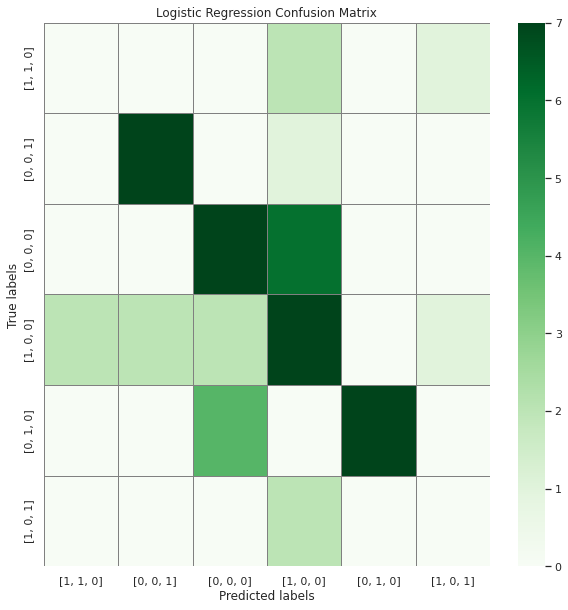

In [11]:
log_grid = {'C': [3], 
            'penalty': ['l1'],
            'solver' : ['liblinear'],
            'max_iter' : [50, 60, 70, 75, 80],
            'warm_start' : [True]
            }

log_estimator = LogisticRegression()

log_model = GridSearchCV(estimator=log_estimator, 
                  param_grid=log_grid, 
                  cv=3,
                  scoring='accuracy')

kf = KFold(n_splits=10)
results = cross_val_score(log_model, X_train, y_train, cv=kf)
print('Cross Validation accuracy scores: %s' % results)
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(results), 
                                                    np.std(results)))
print('===================')


log_model.fit(X_train, y_train)

print("Best Parameters:\n", log_model.best_params_)

# Select best log model
best_log = log_model.best_estimator_

# Make predictions using the optimised parameters
log_pred = best_log.predict(X_test)

print('Logistic Regression accuracy:', round(accuracy_score(y_test, log_pred), 3))
print('Logistic Regression macro f1-score:', round(f1_score(y_test, log_pred, average='macro'), 3))
print(classification_report(y_test, best_log.predict(X_test)))

cm_log = confusion_matrix(y_test, log_pred, labels=labels)

k = 7
cm_log[cm_log > k] = k

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm_log, ax=ax, fmt='g', cmap='Greens', 
            xticklabels=labels, yticklabels=labels, 
            linewidth=1, linecolor='grey') 

# labels, title and ticks
_ = ax.set_xlabel('Predicted labels')
_ = ax.set_ylabel('True labels') 
_ = ax.set_title('Logistic Regression Confusion Matrix')

### SupportingVectorMachines

Cross Validation accuracy scores: [0.69117647 0.75       0.66176471 0.64705882 0.70588235 0.70588235
 0.70588235 0.66176471 0.66176471 0.73529412]
Cross Validation accuracy: 0.693 +/- 0.033
Best Parameters:
 {'C': 1, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'linear'}
SVM accuracy: 0.763
SVM macro f1-score: 0.536
              precision    recall  f1-score   support

   [0, 0, 0]       0.71      0.77      0.74        22
   [0, 0, 1]       0.93      0.93      0.93        14
   [0, 1, 0]       0.92      0.65      0.76        17
   [1, 0, 0]       0.68      0.94      0.79        18
   [1, 0, 1]       0.00      0.00      0.00         2
   [1, 1, 0]       0.00      0.00      0.00         3

    accuracy                           0.76        76
   macro avg       0.54      0.55      0.54        76
weighted avg       0.74      0.76      0.74        76



/home/artem/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/artem/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/artem/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


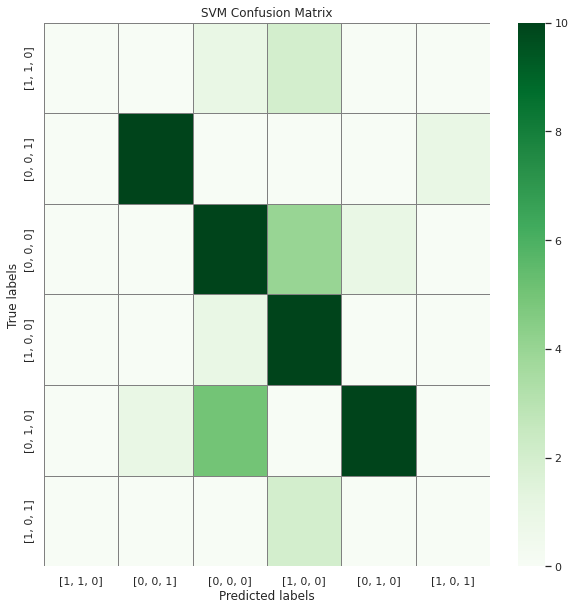

In [12]:
# Parameter grid
svm_param_grid = {'C': [0.1, 0.3, 0.5, 1], 
                  'gamma': ["auto"], 
                  "kernel": ["poly", "linear", "rbf"], 
                  "decision_function_shape" : ["ovo", "ovr"]
                  } 

# Create SVM grid search classifier
svm_grid = GridSearchCV(SVC(), svm_param_grid, cv=3)

kf = KFold(n_splits=10)
results = cross_val_score(svm_grid, X_train, y_train, cv=kf)
print('Cross Validation accuracy scores: %s' % results)
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(results),np.std(results)))
print('===================')


# Train the classifier
svm_grid.fit(X_train, y_train)

print("Best Parameters:\n", svm_grid.best_params_)

# Select best svc
best_svc = svm_grid.best_estimator_

# Make predictions using the optimised parameters
svm_pred = best_svc.predict(X_test)

print('SVM accuracy:', round(accuracy_score(y_test, svm_pred), 3))
print('SVM macro f1-score:', round(f1_score(y_test, svm_pred, average='macro'), 3))

print(classification_report(y_test, best_svc.predict(X_test)))

cm_svm = confusion_matrix(y_test, svm_pred, labels=labels)

k = 10
cm_svm[cm_svm > k] = k

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm_svm,  ax=ax, fmt='g', cmap='Greens', 
            xticklabels=labels, yticklabels=labels, 
            linewidth=1, linecolor='grey')

# labels, title and ticks
_ = ax.set_xlabel('Predicted labels')
_ = ax.set_ylabel('True labels') 
_ = ax.set_title('SVM Confusion Matrix')

# Big ML

## X processing

In [8]:
X2 = data[['covering_function_x', 'covering_function_y']]
X2

,covering_function_x,covering_function_y
0,[ 0.86666667 1.2 2.5 3.733333...,[ 30.45098127 167.66534304 76.09194563 143.77...
1,[ 0.96666667 1.45 2.9 3.016666...,[ 11.61785368 138.3566481 126.71450909 65.47...
2,[ 0.73333333 1.5 2.98333333 3.1 ...,[ 14.73933667 138.70281923 47.70500912 141.70...
3,[ 0.83333333 1.53333333 2.95 3.05 ...,[ 10.45880901 176.14670123 60.50264321 135.84...
4,[ 0.95 1.51666667 2.95 3.033333...,[ 19.82060228 154.18046999 79.26029203 201.44...
...,...,...
751,[ 0.96666667 1.95 2.9 3.916666...,[134.23190117 115.37165359 208.18684596 157.62...
752,[ 0.98333333 1.93333333 2.93333333 3.916666...,[136.44001679 80.20403612 157.12026304 304.46...
753,[ 0.93333333 1.18333333 2.18333333 3.283333...,[ 66.88897493 166.21192835 152.93010887 175.44...
754,[ 0.91666667 1.83333333 2.76666667 3.716666...,[ 91.91672867 141.05014127 174.8236028 138.09...


In [9]:
for column_name in ['covering_function_x', 'covering_function_y']:
    for index in range(X2.shape[0]):
        X2[column_name][index] = X2[column_name][index].strip('[]').strip('\n').replace('\n', '').strip(' ')
        X2[column_name][index] = X2[column_name][index].split(' ')

        vals = []
        clear_vals = []
        for elem in X2[column_name][index]:
            if elem != '' or elem!= ' ':
                vals.append(elem)
        for element in vals:
            if element != '':
                clear_vals.append(eval(element))
        clear_vals = np.array(clear_vals)

        X2[column_name][index] = clear_vals
X2

/tmp/ipykernel_3195/2138449965.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2[column_name][index] = X2[column_name][index].strip('[]').strip('\n').replace('\n', '').strip(' ')
/tmp/ipykernel_3195/2138449965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2[column_name][index] = X2[column_name][index].split(' ')
/tmp/ipykernel_3195/2138449965.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2[column_name][index] = clea

,covering_function_x,covering_function_y
0,"[0.86666667, 1.2, 2.5, 3.73333333, 4.73333333,...","[30.45098127, 167.66534304, 76.09194563, 143.7..."
1,"[0.96666667, 1.45, 2.9, 3.01666667, 4.4, 5.833...","[11.61785368, 138.3566481, 126.71450909, 65.47..."
2,"[0.73333333, 1.5, 2.98333333, 3.1, 4.66666667,...","[14.73933667, 138.70281923, 47.70500912, 141.7..."
3,"[0.83333333, 1.53333333, 2.95, 3.05, 4.6333333...","[10.45880901, 176.14670123, 60.50264321, 135.8..."
4,"[0.95, 1.51666667, 2.95, 3.03333333, 4.55, 5.9...","[19.82060228, 154.18046999, 79.26029203, 201.4..."
...,...,...
751,"[0.96666667, 1.95, 2.9, 3.91666667, 4.86666667...","[134.23190117, 115.37165359, 208.18684596, 157..."
752,"[0.98333333, 1.93333333, 2.93333333, 3.9166666...","[136.44001679, 80.20403612, 157.12026304, 304...."
753,"[0.93333333, 1.18333333, 2.18333333, 3.2833333...","[66.88897493, 166.21192835, 152.93010887, 175...."
754,"[0.91666667, 1.83333333, 2.76666667, 3.7166666...","[91.91672867, 141.05014127, 174.8236028, 138.0..."


In [10]:
dfr = pd.DataFrame()
for index in range(X2.shape[0]):
    arr = np.zeros(40, dtype=float)
    # arr = np.zeros(80, dtype=float)
    
    for i in range(len(X2['covering_function_y'][index])):
        arr[i] = X2['covering_function_y'][index][i]
        # arr[40 + i] = X2['covering_function_x'][index][i]
        
    interim = pd.DataFrame(np.array(arr).reshape(-1,1).T)
    dfr = pd.concat([dfr, interim], ignore_index=True)
dfr

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,30.450981,167.665343,76.091946,143.777117,129.455859,110.594273,70.629043,76.343138,78.149786,51.216411,...,12.198999,11.056774,8.006993,6.898655,6.661706,6.746404,6.135029,4.728476,9.593759,5.188215
1,11.617854,138.356648,126.714509,65.470472,167.286951,195.910936,72.306809,134.002655,123.626995,50.989925,...,15.312798,17.158446,13.080604,10.382942,9.095566,8.507474,7.527162,5.712519,9.114729,5.749861
2,14.739337,138.702819,47.705009,141.701073,130.241939,62.092868,148.352003,161.508859,46.210501,85.683066,...,19.824605,18.005153,13.544265,13.802551,10.341298,10.315526,7.028552,6.094983,8.802531,5.496550
3,10.458809,176.146701,60.502643,135.841996,139.669421,113.790590,165.302268,149.492233,89.722151,103.387346,...,17.263436,16.609156,12.559619,13.398860,14.325732,9.340309,6.674615,8.387905,9.615063,6.028700
4,19.820602,154.180470,79.260292,201.446670,265.910595,98.938965,167.240536,194.758746,57.695623,157.887666,...,21.549251,17.690126,14.093892,14.051982,9.872283,8.593227,7.034058,6.399121,5.081371,4.944073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,134.231901,115.371654,208.186846,157.623267,127.857813,151.186544,155.022306,104.755916,136.876922,95.215514,...,11.698359,9.156390,7.374910,7.517594,7.240018,8.583621,7.969419,6.561901,25.786933,4.830777
752,136.440017,80.204036,157.120263,304.463875,132.342706,176.080080,167.838054,129.318882,134.071028,94.755126,...,12.115301,9.290265,9.805346,6.625984,6.451902,7.258900,4.999885,6.672935,40.569536,4.729133
753,66.888975,166.211928,152.930109,175.449666,121.787907,94.473206,104.684163,108.815850,91.274672,79.200691,...,12.108336,10.280173,8.783079,7.529041,7.255890,6.040468,4.667227,6.664059,15.031480,6.545829
754,91.916729,141.050141,174.823603,138.097559,121.401660,128.008594,110.862153,89.223654,77.106017,79.963224,...,10.112045,11.917518,9.952272,7.702507,12.489845,10.945323,8.398896,6.289245,32.240587,6.233447


## Y processing

In [77]:
Y = data[['disease_diabetes', 'disease_ibs', 'respiratory_disease']]
y = pd.DataFrame()
for line in range(Y.shape[0]):
    disease = {'diseases': str([Y['disease_diabetes'][line], Y['disease_ibs'][line], Y['respiratory_disease'][line]])}
    y = y.append(disease, ignore_index=True)
y

,diseases
0,"[0, 0, 0]"
1,"[0, 0, 0]"
2,"[0, 0, 0]"
3,"[0, 0, 0]"
4,"[0, 0, 0]"
...,...
751,"[1, 1, 0]"
752,"[1, 1, 0]"
753,"[1, 1, 0]"
754,"[1, 1, 0]"


In [11]:
X2_train, X2_test, y_train, y_test = train_test_split(dfr, y, train_size = 0.8)
X2_train.shape, y_train.shape

((604, 40), (604, 1))

In [12]:
labels = y_train['diseases'].unique()
y_train = y_train.to_numpy().ravel()

## Random Forest

Cross Validation accuracy scores: [0.70247934 0.71900826 0.60330579 0.69421488 0.725     ]
Cross Validation accuracy: 0.689 +/- 0.044
Best Parameters:
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 25, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 100, 'n_jobs': -1, 'warm_start': True}
Random Forest accuracy: 0.711
Random Forest f1-score: 0.649
              precision    recall  f1-score   support

   [0, 0, 0]       0.86      1.00      0.93        31
   [0, 0, 1]       0.84      0.93      0.88        41
   [0, 1, 0]       0.94      0.70      0.80        23
   [1, 0, 0]       0.54      0.53      0.53        38
   [1, 0, 1]       0.75      0.75      0.75         4
   [1, 1, 0]       0.00      0.00      0.00        15

    accuracy                           0.71       152
   macro avg       0.66      0.65      0.65       152
weighted avg       0.70      0.71      0.70       152



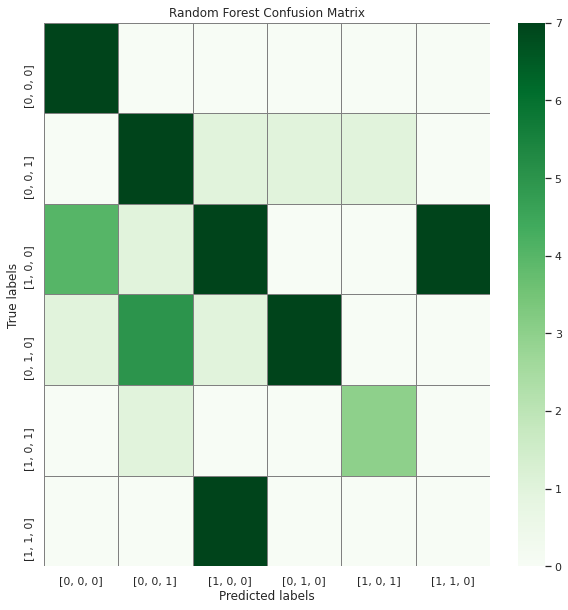

In [13]:
# Hyperparameters search grid 
rf_param_grid = {'bootstrap': [False, True],
         'n_estimators': [50, 100, 150],
         'max_features': ['log2'],
         'min_samples_leaf': [2],
         'min_samples_split': [7, 9],
         # 'class_weight' : ["balanced_subsample"],
                 'criterion' : ['entropy'],
                 'max_depth' : [20, 25, 30],
                 'n_jobs' : [-1], 'warm_start' : [True]
        }

# Instantiate random forest classifier
rf_estimator = RandomForestClassifier(random_state=0)

# Create the GridSearchCV object
rf_model = GridSearchCV(estimator=rf_estimator, param_grid=rf_param_grid, cv=3, scoring='accuracy')


# kf = KFold(n_splits=10)
results = cross_val_score(rf_model, X2_train, y_train) #cv=kf)
print('Cross Validation accuracy scores: %s' % results)
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(results),np.std(results)))
print('===================')

# Fine-tune the hyperparameters
rf_model.fit(X2_train, y_train)

print("Best Parameters:\n", rf_model.best_params_)

# Get the best model
rf_model_best = rf_model.best_estimator_

# Make predictions using the optimised parameters
rf_pred = rf_model_best.predict(X2_test)

print('Random Forest accuracy:', round(accuracy_score(y_test, rf_pred), 3))
print('Random Forest f1-score:', round(f1_score(y_test, rf_pred, average='macro'), 3))
print(classification_report(y_test, rf_model_best.predict(X2_test)))

cm_rf = confusion_matrix(y_test, rf_pred, labels=labels)

k = 7
cm_rf[cm_rf > k] = k

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm_rf,  ax=ax, fmt='g', cmap='Greens', 
            xticklabels=labels, yticklabels=labels, 
            linewidth=1, linecolor='grey')

# labels, title and ticks
_ = ax.set_xlabel('Predicted labels')
_ = ax.set_ylabel('True labels') 
_ = ax.set_title('Random Forest Confusion Matrix')

## Naive Bayes

Cross Validation accuracy scores: [0.14754098 0.18032787 0.16393443 0.08196721 0.08333333 0.18333333
 0.16666667 0.11666667 0.08333333 0.13333333]
Cross Validation accuracy: 0.134 +/- 0.039
Best Parameters:
 {'var_smoothing': 1e-09}
Naive Bayes accuracy: 0.125
Naive Bayes macro f1-score: 0.117
              precision    recall  f1-score   support

   [0, 0, 0]       0.25      0.17      0.20        29
   [0, 0, 1]       0.15      0.06      0.09        34
   [0, 1, 0]       0.00      0.00      0.00        24
   [1, 0, 0]       0.00      0.00      0.00        46
   [1, 0, 1]       0.17      0.33      0.22         3
   [1, 1, 0]       0.11      0.69      0.19        16

    accuracy                           0.12       152
   macro avg       0.11      0.21      0.12       152
weighted avg       0.10      0.12      0.08       152



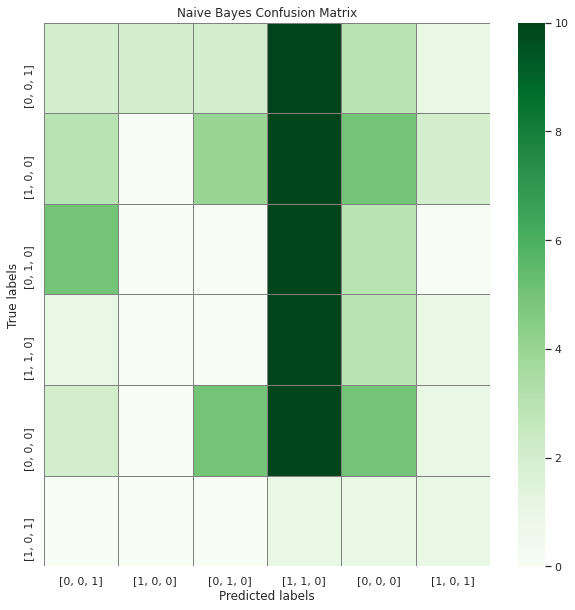

In [85]:
# Hyperparameters search grid 
nb_param_grid = {'var_smoothing': [1e-9, 1e-15, 1e-5, 0]}

# Instantiate naive bayes classifier
nb_estimator = GaussianNB()

# Create a Gaussian classifier
nb_model = GridSearchCV(estimator=nb_estimator, param_grid=nb_param_grid, cv=3, scoring='accuracy')


kf = KFold(n_splits=10)
results = cross_val_score(nb_model, X_train, y_train, cv=kf)
print('Cross Validation accuracy scores: %s' % results)
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(results),
                                                    np.std(results)))
print('===================')

nb_model.fit(X_train, y_train)

print("Best Parameters:\n", nb_model.best_params_)

nb_pred = nb_model.predict(X_test)

print('Naive Bayes accuracy:', round(accuracy_score(y_test, nb_pred), 3))
print('Naive Bayes macro f1-score:', round(f1_score(y_test, nb_pred, average='macro'), 3))
print(classification_report(y_test, nb_model.predict(X_test)))

cm_nb = confusion_matrix(y_test, nb_pred, labels=labels)

k = 10
cm_nb[cm_nb > k] = k

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm_nb, ax=ax, fmt='g', cmap='Greens', 
            xticklabels=labels, yticklabels=labels, 
            linewidth=1, linecolor='grey') 

# labels, title and ticks
_ = ax.set_xlabel('Predicted labels')
_ = ax.set_ylabel('True labels') 
_ = ax.set_title('Naive Bayes Confusion Matrix')

## Catboost

In [14]:
cat = CatBoostClassifier(silent=True)
params = {  
    "max_depth": [3],
    "learning_rate": [0.1],
    "iterations": [75]
}

search_cat = GridSearchCV(estimator=cat, param_grid = params, n_jobs=-1)
kf = KFold(n_splits=3)
results = cross_val_score(search_cat, X2_train, y_train, cv=kf)
print('Cross Validation accuracy scores: %s' % results)
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(results),
                                                    np.std(results)))
print('===================')

search_cat.fit(X2_train, y_train)
print(search_cat.best_params_)

print(classification_report(y_test, search_cat.best_estimator_.predict(X2_test)))

Cross Validation accuracy scores: [0.71782178 0.70149254 0.70646766]
Cross Validation accuracy: 0.709 +/- 0.007
{'iterations': 75, 'learning_rate': 0.1, 'max_depth': 3}
              precision    recall  f1-score   support

   [0, 0, 0]       0.86      1.00      0.93        31
   [0, 0, 1]       0.86      0.93      0.89        41
   [0, 1, 0]       0.86      0.83      0.84        23
   [1, 0, 0]       0.68      0.89      0.77        38
   [1, 0, 1]       0.00      0.00      0.00         4
   [1, 1, 0]       0.00      0.00      0.00        15

    accuracy                           0.80       152
   macro avg       0.54      0.61      0.57       152
weighted avg       0.71      0.80      0.75       152



/home/artem/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/artem/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/artem/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## LogisticRegression

/home/artem/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/artem/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/artem/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/artem/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/artem/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge

Cross Validation accuracy scores: [0.6557377  0.6557377  0.6557377  0.59016393 0.68333333 0.61666667
 0.56666667 0.63333333 0.78333333 0.66666667]
Cross Validation accuracy: 0.651 +/- 0.056


/home/artem/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/artem/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Best Parameters:
 {'C': 3, 'max_iter': 70, 'penalty': 'l1', 'solver': 'liblinear', 'warm_start': True}
Logistic Regression accuracy: 0.671
Logistic Regression macro f1-score: 0.58
              precision    recall  f1-score   support

   [0, 0, 0]       0.79      0.87      0.83        31
   [0, 0, 1]       0.87      0.66      0.75        41
   [0, 1, 0]       0.67      0.78      0.72        23
   [1, 0, 0]       0.57      0.68      0.62        38
   [1, 0, 1]       0.33      0.75      0.46         4
   [1, 1, 0]       0.20      0.07      0.10        15

    accuracy                           0.67       152
   macro avg       0.57      0.64      0.58       152
weighted avg       0.67      0.67      0.66       152



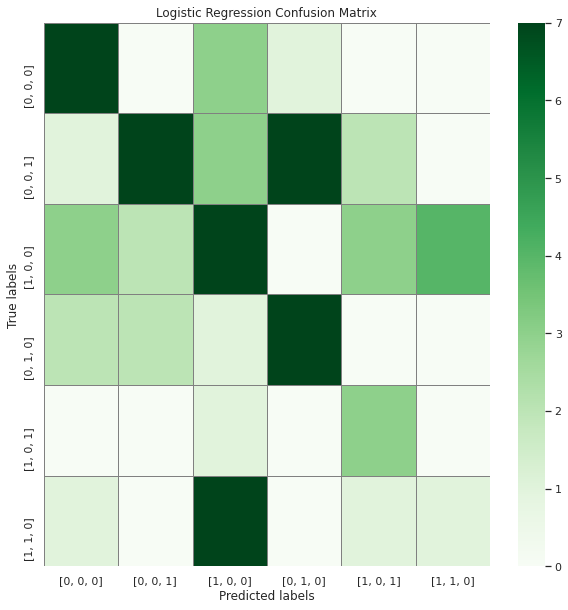

In [16]:
log_grid = {'C': [3], 
            'penalty': ['l1'],
            'solver' : ['liblinear'],
            'max_iter' : [70, 75],
            'warm_start' : [True]
            }

log_estimator = LogisticRegression()

log_model = GridSearchCV(estimator=log_estimator, 
                  param_grid=log_grid, 
                  cv=3,
                  scoring='accuracy')

kf = KFold(n_splits=10)
results = cross_val_score(log_model, X2_train, y_train, cv=kf)
print('Cross Validation accuracy scores: %s' % results)
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(results), 
                                                    np.std(results)))
print('===================')


log_model.fit(X2_train, y_train)

print("Best Parameters:\n", log_model.best_params_)

# Select best log model
best_log = log_model.best_estimator_

# Make predictions using the optimised parameters
log_pred = best_log.predict(X2_test)

print('Logistic Regression accuracy:', round(accuracy_score(y_test, log_pred), 3))
print('Logistic Regression macro f1-score:', round(f1_score(y_test, log_pred, average='macro'), 3))
print(classification_report(y_test, best_log.predict(X2_test)))

cm_log = confusion_matrix(y_test, log_pred, labels=labels)

k = 7
cm_log[cm_log > k] = k

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm_log, ax=ax, fmt='g', cmap='Greens', 
            xticklabels=labels, yticklabels=labels, 
            linewidth=1, linecolor='grey') 

# labels, title and ticks
_ = ax.set_xlabel('Predicted labels')
_ = ax.set_ylabel('True labels') 
_ = ax.set_title('Logistic Regression Confusion Matrix')

## SVM

Cross Validation accuracy scores: [0.67213115 0.62295082 0.55737705 0.57377049 0.66666667 0.55
 0.6        0.68333333 0.73333333 0.61666667]
Cross Validation accuracy: 0.628 +/- 0.057
Best Parameters:
 {'C': 0.1, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'linear'}
SVM accuracy: 0.651
SVM macro f1-score: 0.523
              precision    recall  f1-score   support

   [0, 0, 0]       0.74      0.81      0.77        31
   [0, 0, 1]       0.93      0.66      0.77        41
   [0, 1, 0]       0.52      0.65      0.58        23
   [1, 0, 0]       0.57      0.79      0.66        38
   [1, 0, 1]       0.29      0.50      0.36         4
   [1, 1, 0]       0.00      0.00      0.00        15

    accuracy                           0.65       152
   macro avg       0.51      0.57      0.52       152
weighted avg       0.63      0.65      0.63       152



/home/artem/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/artem/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/artem/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


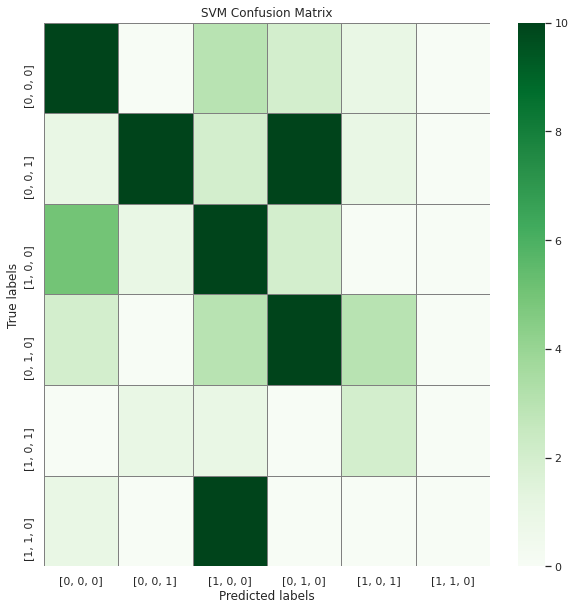

In [17]:
# Parameter grid
svm_param_grid = {'C': [0.1, 0.2, 0.3], 
                  'gamma': ["auto"], 
                  "kernel": ["poly", "linear", "rbf"], 
                  "decision_function_shape" : ["ovo", "ovr"]
                  } 

# Create SVM grid search classifier
svm_grid = GridSearchCV(SVC(), svm_param_grid, cv=3)

kf = KFold(n_splits=10)
results = cross_val_score(svm_grid, X2_train, y_train, cv=kf)
print('Cross Validation accuracy scores: %s' % results)
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(results),np.std(results)))
print('===================')


# Train the classifier
svm_grid.fit(X2_train, y_train)

print("Best Parameters:\n", svm_grid.best_params_)

# Select best svc
best_svc = svm_grid.best_estimator_

# Make predictions using the optimised parameters
svm_pred = best_svc.predict(X2_test)

print('SVM accuracy:', round(accuracy_score(y_test, svm_pred), 3))
print('SVM macro f1-score:', round(f1_score(y_test, svm_pred, average='macro'), 3))

print(classification_report(y_test, best_svc.predict(X2_test)))

cm_svm = confusion_matrix(y_test, svm_pred, labels=labels)

k = 10
cm_svm[cm_svm > k] = k

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm_svm,  ax=ax, fmt='g', cmap='Greens', 
            xticklabels=labels, yticklabels=labels, 
            linewidth=1, linecolor='grey')

# labels, title and ticks
_ = ax.set_xlabel('Predicted labels')
_ = ax.set_ylabel('True labels') 
_ = ax.set_title('SVM Confusion Matrix')